In [2]:
import pandas as pd

# Load the dataset from your file path
df = pd.read_csv(r"customer_booking.csv", encoding="ISO-8859-1")

# Show the first few rows of the dataset
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [2]:
# Check the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [3]:
# Convert 'flight_day' to numerical values (you've already done this, so just to confirm)
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

# Convert other categorical columns to 'category' type
df['sales_channel'] = df['sales_channel'].astype('category')
df['trip_type'] = df['trip_type'].astype('category')
df['route'] = df['route'].astype('category')
df['booking_origin'] = df['booking_origin'].astype('category')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   num_passengers         50000 non-null  int64   
 1   sales_channel          50000 non-null  category
 2   trip_type              50000 non-null  category
 3   purchase_lead          50000 non-null  int64   
 4   length_of_stay         50000 non-null  int64   
 5   flight_hour            50000 non-null  int64   
 6   flight_day             50000 non-null  int64   
 7   route                  50000 non-null  category
 8   booking_origin         50000 non-null  category
 9   wants_extra_baggage    50000 non-null  int64   
 10  wants_preferred_seat   50000 non-null  int64   
 11  wants_in_flight_meals  50000 non-null  int64   
 12  flight_duration        50000 non-null  float64 
 13  booking_complete       50000 non-null  int64   
dtypes: category(4), float64(1), int64(9)
m

In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])
df['route'] = label_encoder.fit_transform(df['route'])
df['booking_origin'] = label_encoder.fit_transform(df['booking_origin'])

# Verify the transformation
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


## Train a ML Model (Random Forest)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features and target
X = df.drop('booking_complete', axis=1)  # All columns except 'booking_complete'
y = df['booking_complete']  # Target column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8541
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.54      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000



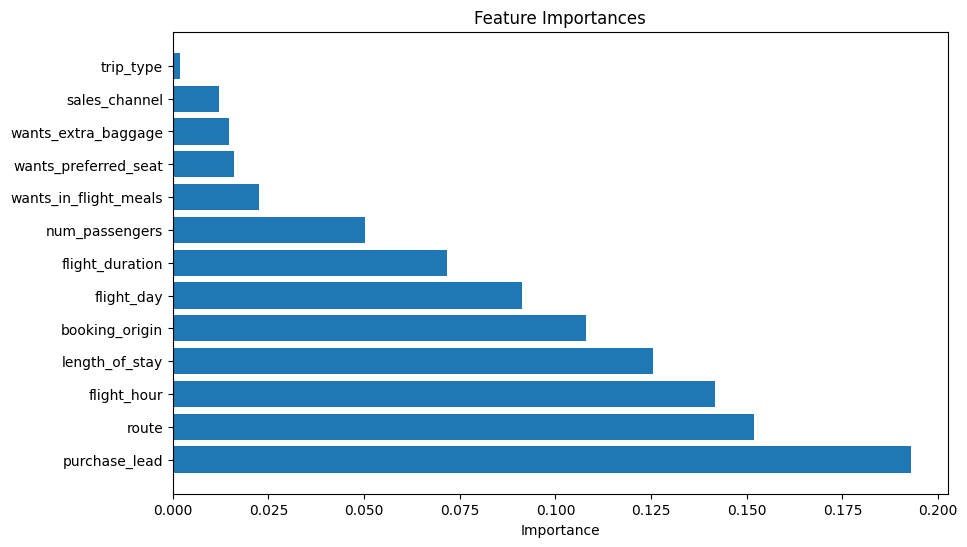

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort the features by importance
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), feature_importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Importance")
plt.show()